### Investigation: RX($\phi$) with correlated CRX($\gamma \phi$) noise on the circuit-level with ideal hyperparameters

In [1]:
import sys
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
module_path = os.path.abspath(
    os.path.join(
        "/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control"
    )
)
if module_path not in sys.path:
    sys.path.append(module_path)

from correlated_noise_q_env_config import (
    q_env_config as gate_q_env_config,
    circuit_context,
    circuit_gate_times,
)
from quantumenvironment import QuantumEnvironment
from context_aware_quantum_environment import ContextAwareQuantumEnvironment
from ppo import make_train_ppo
from helper_functions import load_from_yaml_file
from gymnasium.wrappers import RescaleAction, ClipAction


import logging

logging.basicConfig(
    level=logging.WARNING,
    format="%(asctime)s INFO %(message)s",  # hardcoded INFO level
    datefmt="%Y-%m-%d %H:%M:%S",
    stream=sys.stdout,
)

/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/venv_qiskit10/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



 NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'unitary']
  Instructions with noise: ['custom_kron(rx,ident)_gate']
  Qubits with noise: [0, 1]
  Specific qubit errors: [('custom_kron(rx,ident)_gate', (0, 1))] 

Circuit context
     ┌─────────────────────────────┐     
q_0: ┤0                            ├──■──
     │  custom_kron(rx,ident)_gate │┌─┴─┐
q_1: ┤1                            ├┤ X ├
     └─────────────────────────────┘└───┘


/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/venv_qiskit10/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/venv_qiskit10/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [2]:
q_env = ContextAwareQuantumEnvironment(gate_q_env_config, circuit_context)
# q_env = QuantumEnvironment(gate_q_env_config)

/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/venv_qiskit10/lib/python3.11/site-packages/qiskit_ibm_runtime/session.py:156: UserWarning: Session is not supported in local testing mode or when using a simulator.
  warnings.warn(


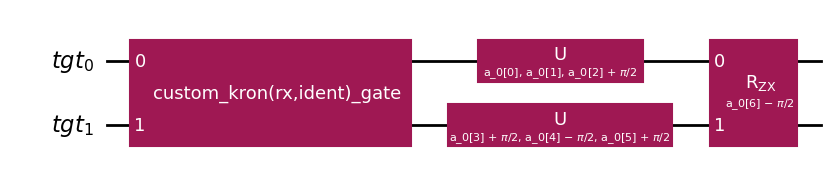

In [3]:
q_env.circuit_truncations[0].draw("mpl")

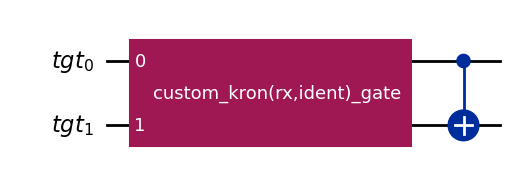

In [4]:
q_env.baseline_truncations[0].draw("mpl")

In [5]:
phi = 'pi'
gamma = 0.01

In [6]:
q_env = ContextAwareQuantumEnvironment(gate_q_env_config, circuit_context)
# q_env = QuantumEnvironment(gate_q_env_config)
q_env = ClipAction(q_env)
q_env = RescaleAction(q_env, -1.0, 1.0)
agent_config = load_from_yaml_file('/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/template_configurations/agent_config.yaml')
train_agent = make_train_ppo(agent_config, q_env)
training_results = train_agent(total_updates=200, print_debug=False, num_prints=100)
training_results['total_shots'] = q_env.total_shots

100%|██████████| 200/200 [02:25<00:00,  1.37it/s]
/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/venv_qiskit10/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.total_shots to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.total_shots` for environment variables or `env.get_wrapper_attr('total_shots')` that will search the reminding wrappers.
  logger.warn(


In [7]:
from helper_functions import get_hardware_runtime_cumsum

In [11]:
custom_rx_gate_label = "custom_kron(rx,ident)_gate"
single_qubit_gate_time = 1.6e-7
two_qubit_gate_time = 5.3e-7
readout_time = 1.2e-6
reset_time = 1.0e-6

gates_done_by_software = ['rz', 's', 't']

circuit_gate_times = {
    custom_rx_gate_label: single_qubit_gate_time,
    'x': single_qubit_gate_time,
    'sx': single_qubit_gate_time,
    'h': single_qubit_gate_time,
    'u': single_qubit_gate_time,
    'rzx': two_qubit_gate_time,
    'reset': reset_time,
    'measure': readout_time,
}
circuit_gate_times.update({gate: 0.0 for gate in gates_done_by_software})

In [12]:
circuit_gate_times

{'custom_kron(rx,ident)_gate': 1.6e-07,
 'x': 1.6e-07,
 'sx': 1.6e-07,
 'h': 1.6e-07,
 'u': 1.6e-07,
 'rzx': 5.3e-07,
 'reset': 1e-06,
 'measure': 1.2e-06,
 'rz': 0.0,
 's': 0.0,
 't': 0.0}

In [14]:
runtime_estimate = get_hardware_runtime_cumsum(q_env.circuit_truncations[0], circuit_gate_times, q_env.unwrapped._total_shots)

array([ 0.10248 ,  0.429135,  0.79422 ,  1.159305,  1.428315,  1.697325,
        1.94712 ,  2.235345,  2.542785,  2.83101 ,  3.17688 ,  3.426675,
        3.75333 ,  3.94548 ,  4.195275,  4.541145,  4.630815,  4.91904 ,
        5.18805 ,  5.64921 ,  5.82855 ,  6.039915,  6.308925,  6.52029 ,
        6.73806 ,  6.987855,  7.333725,  7.423395,  7.67319 ,  7.90377 ,
        8.268855,  8.461005,  8.7108  ,  8.94138 ,  9.18477 ,  9.434565,
        9.703575,  9.91494 , 10.10709 , 10.28643 , 10.5042  , 10.753995,
       10.958955, 11.266395, 11.55462 , 11.765985, 12.034995, 12.137475,
       12.50256 , 12.92529 , 13.13025 , 13.27116 , 13.41207 , 13.68108 ,
       13.91166 , 14.2191  , 14.52654 , 14.71869 , 14.9877  , 15.29514 ,
       15.51291 , 15.801135, 16.05093 , 16.377585, 16.646595, 16.915605,
       17.146185, 17.43441 , 17.62656 , 17.914785, 18.222225, 18.491235,
       18.760245, 19.12533 , 19.35591 , 19.77864 , 20.04765 , 20.31666 ,
       20.604885, 20.96997 , 21.20055 , 21.46956 , 

In [ ]:
store_results_one_param_config = {}

for seed in range(1, 4):
    q_env = ContextAwareQuantumEnvironment(gate_q_env_config, circuit_context)
    # q_env = QuantumEnvironment(gate_q_env_config)
    q_env = ClipAction(q_env)
    q_env = RescaleAction(q_env, -1.0, 1.0)
    agent_config = load_from_yaml_file('/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/template_configurations/agent_config.yaml')
    train_agent = make_train_ppo(agent_config, q_env)
    training_results = train_agent(total_updates=597, print_debug=False, num_prints=100)
    training_results['total_shots'] = q_env.total_shots
    store_results_one_param_config[seed] = training_results

In [ ]:
file_name = f'multi_seed_results_phi-{phi}_gamma-{gamma}.pickle'
saving_dir = os.path.join('multi_seed_results_restrict_actionspace', file_name)

In [ ]:
with open(saving_dir, 'wb') as handle:
    pickle.dump(store_results_one_param_config, handle, protocol=pickle.HIGHEST_PROTOCOL)